In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from plotly.subplots import make_subplots
from datetime import datetime

In [ ]:
df = pd.read_csv("archive/country_wise_latest.csv")
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()
df.info()

In [ ]:
vaccine = pd.read_csv('archive/day_wise.csv')
vaccine["Date"] = pd.to_datetime(vaccine["Date"], format="%Y-%m-%d")
vaccine["Date"]

In [ ]:
df = df.drop(["New cases", "New deaths", "New recovered", "Deaths / 100 Cases", "Recovered / 100 Cases", "Deaths / 100 Recovered", "Confirmed last week", "1 week change", "1 week % increase", "WHO Region"], axis=1)
df.tail()

In [ ]:
# Creating a pivot table
countrywise = pd.pivot_table(df, values=["Confirmed", "Deaths", "Recovered"], index="Country/Region", aggfunc=max)
countrywise

In [ ]:
countrywise["Recovery Rate"] = countrywise["Recovered"] * 100 / countrywise["Confirmed"]
countrywise["Recovery Rate"]

In [ ]:
countrywise["Mortality Rate"] = countrywise["Deaths"] * 100 / countrywise["Confirmed"]
countrywise["Mortality Rate"]

In [ ]:
countrywise = countrywise.sort_values(by="Confirmed", ascending=False)
countrywise.head()

In [ ]:
countrywise.style.background_gradient(cmap="GnBu")

In [ ]:
countrywise.sample(5).style.background_gradient(cmap="GnBu")

In [68]:
top_10_active_countries = df.groupby(by="Country/Region").max()[["Active"]].sort_values(by="Active", ascending=False).nlargest(10, columns="Active")
top_10_active_countries

,Active
Country/Region,
US,2816444
Brazil,508116
India,495499
United Kingdom,254427
Russia,201097
South Africa,170537
Colombia,117163
France,108928
Canada,107514


ValueError: Could not interpret input 'Country/Region'

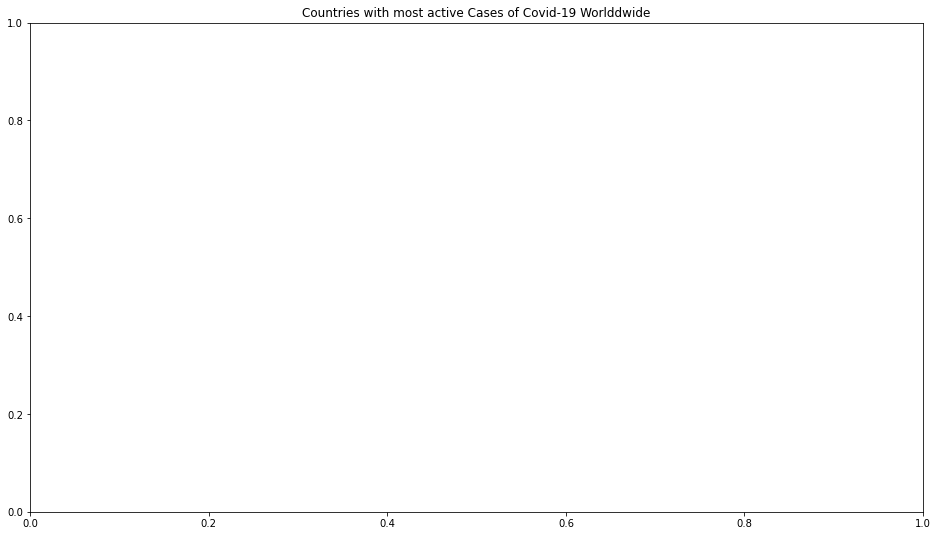

In [75]:
plt.figure(figsize= (16, 9))
plt.title("Countries with most active Cases of Covid-19 Worldwide")
ax = sns.barplot(data= top_10_active_countries, x = "Country/Region", y = "Active")